In [1]:
# Alejandro Recouso Ferreiro - recouso@usc.edu

In [2]:
# first install missing libraries
!pip install xgboost

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
# import relevant libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [45]:
data = pd.read_csv('CompetitionDataPython.csv', parse_dates=[0], index_col=[0])

In [46]:
data.tail()

,Hour,Temperature,Load,Predicted.Load,DaysOfWeek,Time
Date,,,,,,
2012-12-31,20,"22,33",NaN,NaN,Monday,43844
2012-12-31,21,"20,67",NaN,NaN,Monday,43845
2012-12-31,22,"19,67",NaN,NaN,Monday,43846
2012-12-31,23,"19,33",NaN,NaN,Monday,43847
2012-12-31,24,"18,33",NaN,NaN,Monday,43848


In [47]:
data['Temperature'] = data['Temperature'].str.replace(',', '.').astype(float)

In [48]:
split_date = '01-Jan-2012'
data_train = data.loc[data.index < split_date].copy()
data_test = data.loc[data.index >= split_date].copy()

In [49]:
data_train.tail()

,Hour,Temperature,Load,Predicted.Load,DaysOfWeek,Time
Date,,,,,,
2011-12-31,20,39.33,11812.0,NaN,Saturday,35060
2011-12-31,21,39.33,11542.0,NaN,Saturday,35061
2011-12-31,22,39.00,11149.0,NaN,Saturday,35062
2011-12-31,23,39.33,10855.0,NaN,Saturday,35063
2011-12-31,24,39.00,10335.0,NaN,Saturday,35064


In [50]:
def create_features(df, label=None):
    df['temperature'] = df['Temperature']
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['temperature', 'hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [51]:
X_train, y_train = create_features(data_train, label='Load')
X_test, y_test = create_features(data_test, label='Load')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [114]:
reg = xgb.XGBRegressor(n_estimators=50)
eval_set = [(X_train, y_train)]
reg.fit(X_train, y_train,
        eval_set=eval_set,
        early_stopping_rounds=15,
        verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

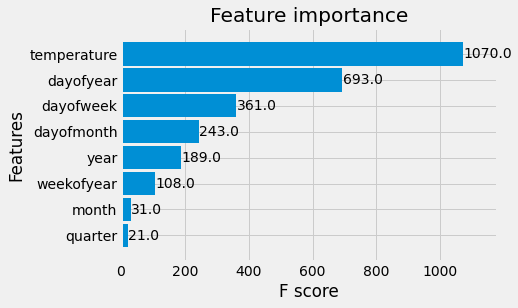

In [115]:
_ = plot_importance(reg, height=0.9)

In [116]:
data_test['load_pred'] = reg.predict(X_test)
data_train['load_pred_train'] = reg.predict(X_train)
data_all = pd.concat([data_test, data_train], sort=False)

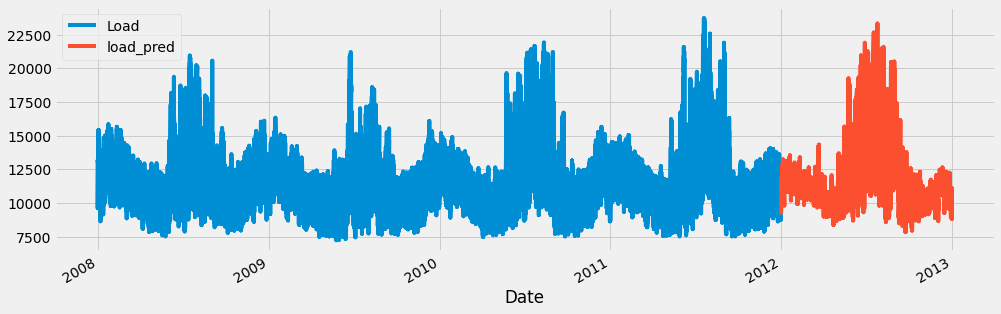

In [117]:
_ = data_all[['Load','load_pred']].plot(figsize=(15, 5))

In [118]:
data_all.to_csv(r'python_pred_xgb.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53d6ad8e-f374-42cb-979d-3d9515656bf8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>